# Pre Processing

In [2]:

import pandas as pd
!pip install dmba
!pip install pykan


In [3]:
df = pd.read_csv('DataCoSupplyChainDataset.csv', header=0, encoding='unicode_escape')

In [4]:
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [5]:
df.shape

(180519, 53)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [7]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [8]:
df['Cust_Full_Name'] = df['Customer Fname'].astype(str) + df['Customer Lname'].astype(str)

In [9]:
df.select_dtypes(include=['object']).describe()

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,...,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Image,Product Name,shipping date (DateOrders),Shipping Mode,Cust_Full_Name
count,180519,180519,180519,180519,180519,180519,180519,180511,180519,180519,...,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519
unique,4,4,50,563,2,1,782,1109,1,3,...,164,65752,23,1089,9,118,118,63701,4,14033
top,DEBIT,Late delivery,Cleats,Caguas,EE. UU.,XXXXXXXXX,Mary,Smith,XXXXXXXXX,Consumer,...,Estados Unidos,12/14/2016 12:29,Central America,Inglaterra,COMPLETE,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,1/5/2016 5:58,Standard Class,MarySmith
freq,69295,98977,24551,66770,111146,180519,65150,64104,180519,93504,...,24840,5,28341,6722,59491,24515,24515,10,107752,23884


# Data Cleaning

In [10]:
data = df.copy()

In [11]:
data.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname',
         'Customer Lname','Latitude','Longitude','Product Description','Product Image','Order Zipcode',
         'shipping date (DateOrders)'],axis=1, inplace = True)

In [12]:
data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Cust_Full_Name
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.750000,Standard Class,CallyHolloway
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.750000,Standard Class,IreneLuna
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.750000,Standard Class,GillianMaldonado
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.750000,Standard Class,TanaTate
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.750000,Standard Class,OrliHendricks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,40.000000,Eastern Asia,Shanghái,CLOSED,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Standard Class,MariaPeterson
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,-613.770019,Eastern Asia,Osaka,COMPLETE,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Second Class,RonaldClark
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,141.110001,Oceania,Australia del Sur,PENDING,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Standard Class,JohnSmith
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,186.229996,Oceania,Australia del Sur,PENDING_PAYMENT,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Standard Class,MarySmith


In [13]:
data.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Customer Zipcode                 3
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ra

In [14]:
#Deopping unnecessary values
data = data.dropna(subset=['Product Price', 'Shipping Mode'])

In [15]:
#using order date to get the date in year month week and hrs.

data['order date (DateOrders)'].head()


## Splitting Order dates and creating new columns
df['order_yr']= pd.DatetimeIndex(df['order date (DateOrders)']).year
df['order_month'] = pd.DatetimeIndex(df['order date (DateOrders)']).month
df['order_day'] = pd.DatetimeIndex(df['order date (DateOrders)']).weekday
df['order_hour'] = pd.DatetimeIndex(df['order date (DateOrders)']).hour

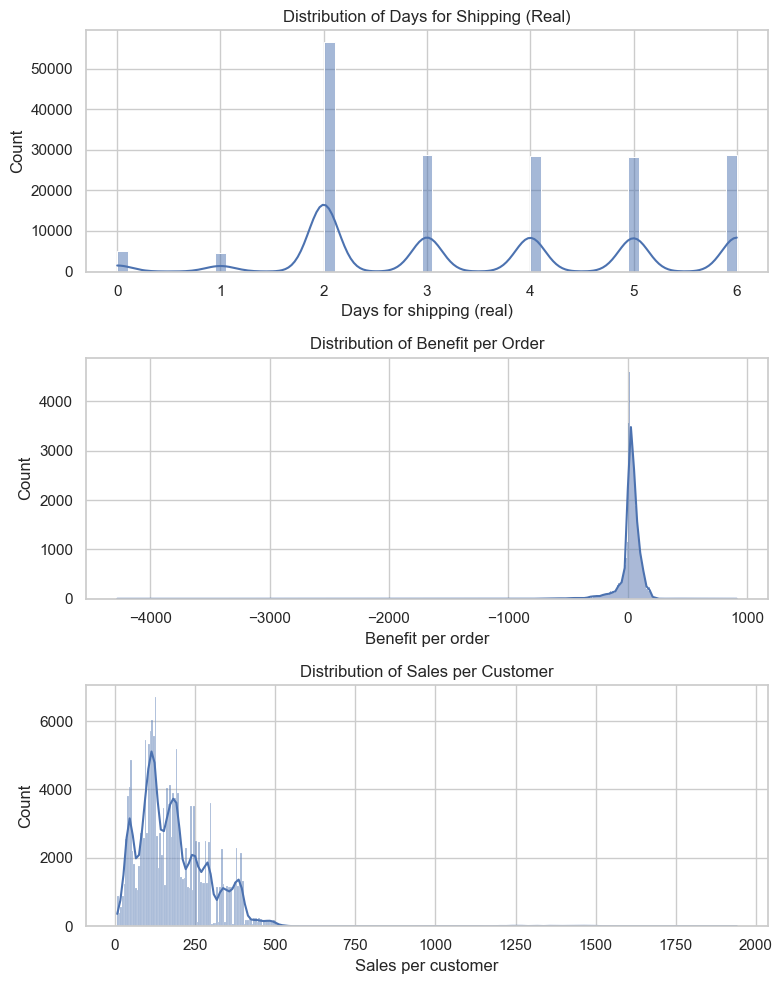

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style for the plots
sns.set(style="whitegrid")

# Step 1: Distribution of Key Numerical Variables
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# Histogram of Days for shipping (real)
sns.histplot(data, x='Days for shipping (real)', kde=True, ax=axs[0])
axs[0].set_title('Distribution of Days for Shipping (Real)')

# Histogram of Benefit per order
sns.histplot(data, x='Benefit per order', kde=True, ax=axs[1])
axs[1].set_title('Distribution of Benefit per Order')

# Histogram of Sales per Customer
sns.histplot(data, x='Sales per customer', kde=True, ax=axs[2])
axs[2].set_title('Distribution of Sales per Customer')

# Step 2: Categorical Data Analysis (in subsequent cells due to plot size considerations)
plt.tight_layout()
plt.show()


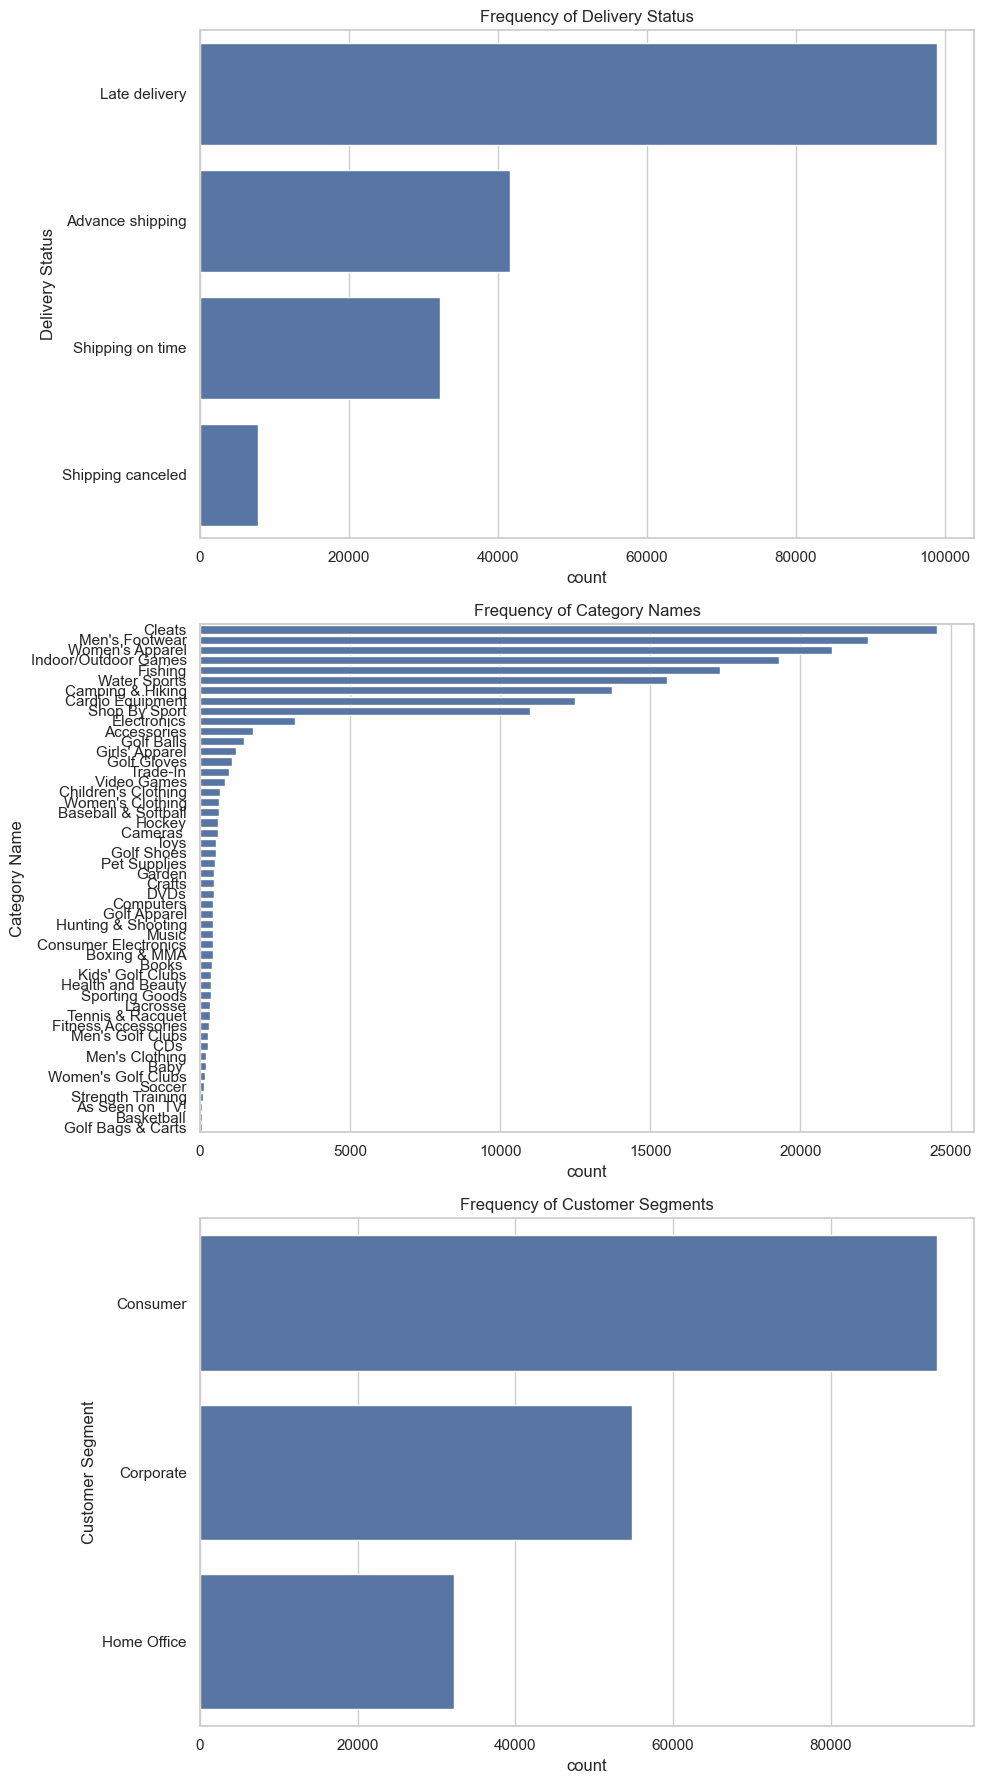

In [17]:
#  Categorical Data Analysis
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Bar plot of Delivery Status
sns.countplot(data, y='Delivery Status', order=data['Delivery Status'].value_counts().index, ax=axs[0])
axs[0].set_title('Frequency of Delivery Status')

# Bar plot of Category Name
sns.countplot(data, y='Category Name',  order=data['Category Name'].value_counts().index, ax=axs[1])
axs[1].set_title('Frequency of Category Names')

# Bar plot of Customer Segment
sns.countplot(data, y='Customer Segment',  order=data['Customer Segment'].value_counts().index, ax=axs[2])
axs[2].set_title('Frequency of Customer Segments')

plt.tight_layout()
plt.show()


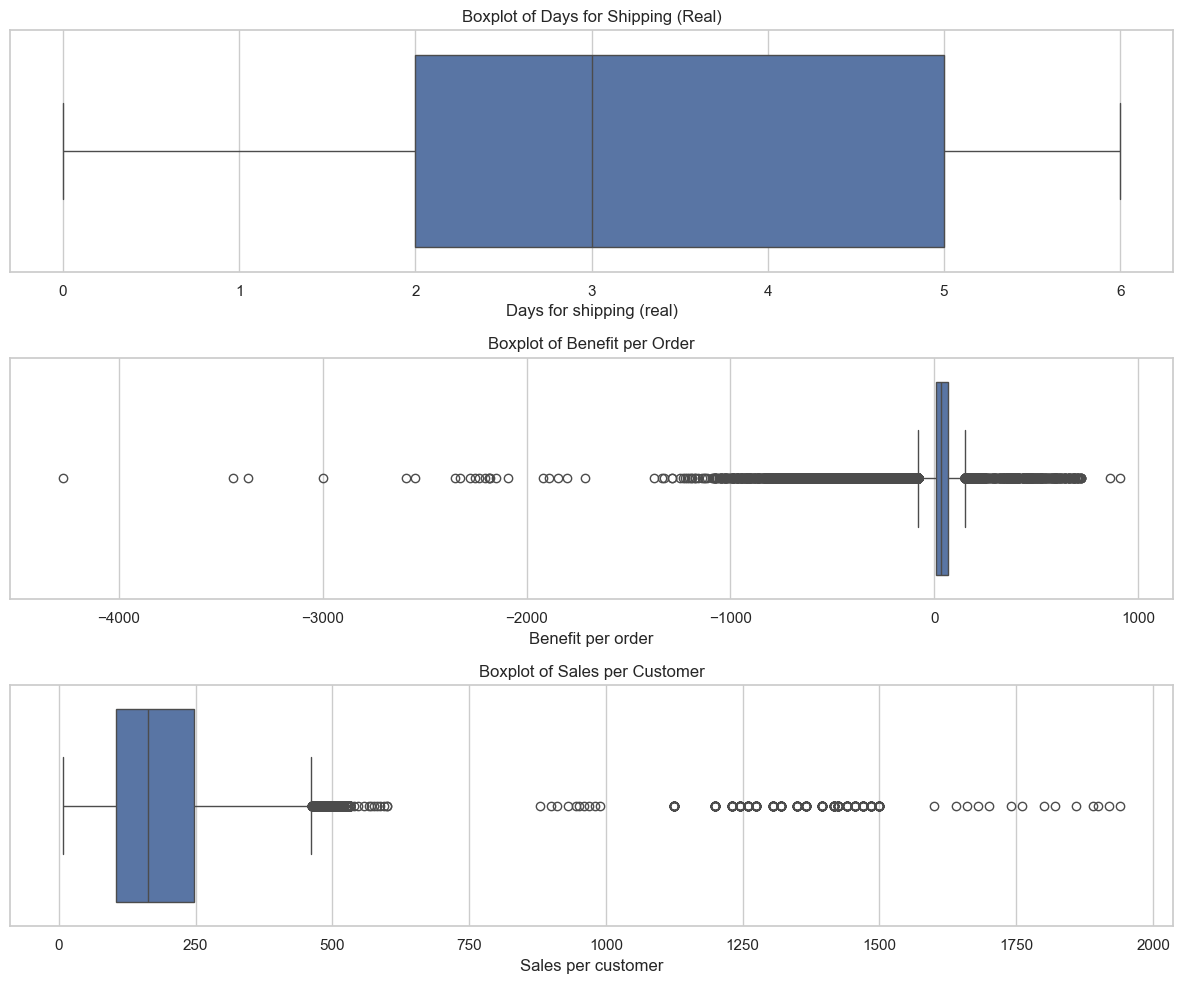

In [18]:
#  Outliers Detection
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# Boxplot for Days for shipping (real)
sns.boxplot(data, x='Days for shipping (real)', ax=axs[0])
axs[0].set_title('Boxplot of Days for Shipping (Real)')

# Boxplot for Benefit per order
sns.boxplot(data, x='Benefit per order', ax=axs[1])
axs[1].set_title('Boxplot of Benefit per Order')

# Boxplot for Sales per customer
sns.boxplot(data, x='Sales per customer', ax=axs[2])
axs[2].set_title('Boxplot of Sales per Customer')

plt.tight_layout()
plt.show()

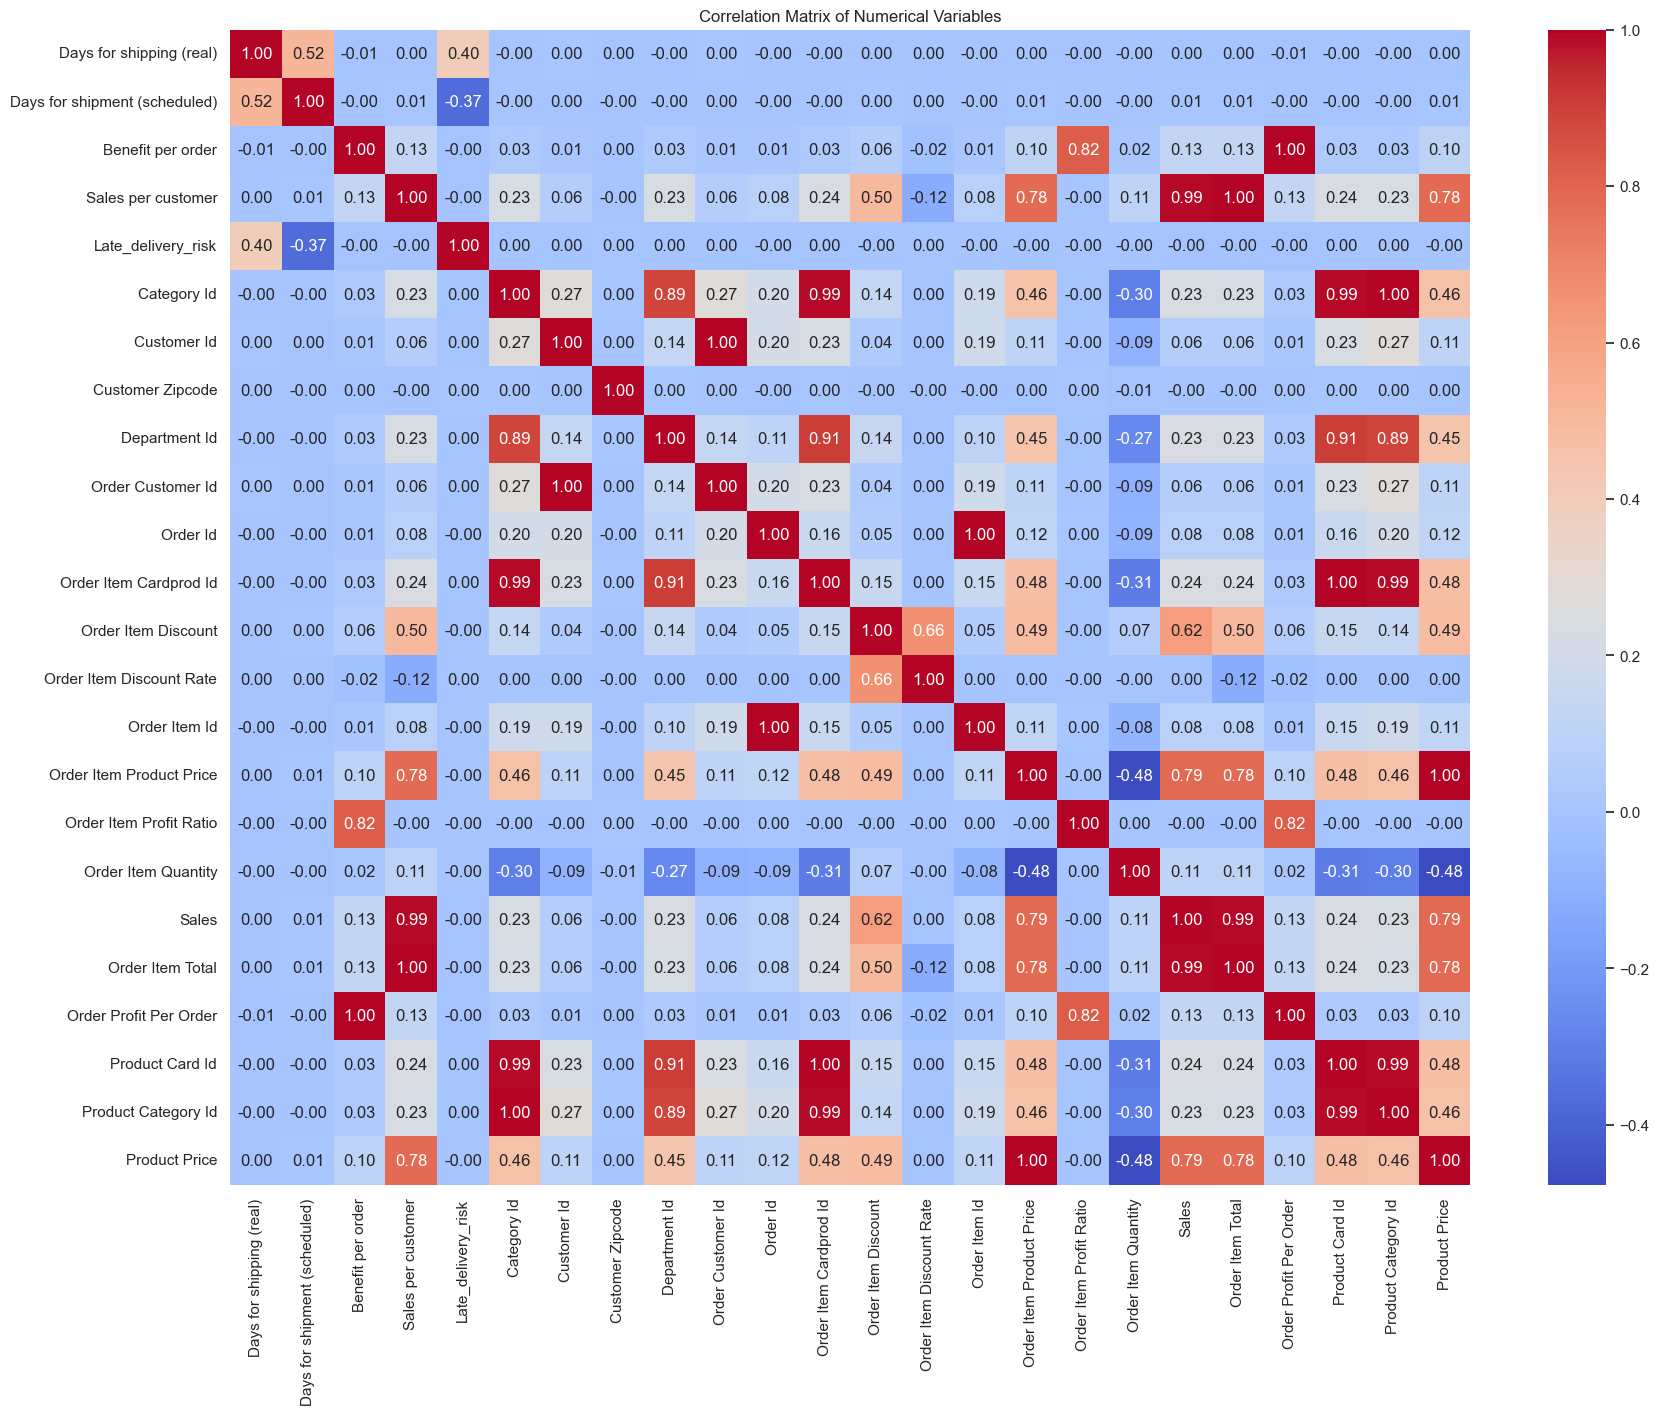

In [19]:
# Correlation Matrix
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


In [20]:
# We will create a baseline for loss if the Benifit per order is less than 0

loss = data[data['Benefit per order']<0]

In [21]:
loss['Category Name'].value_counts().nlargest(10)


Category Name
Cleats                  4590
Men's Footwear          4169
Women's Apparel         3923
Indoor/Outdoor Games    3617
Fishing                 3209
Water Sports            2924
Camping & Hiking        2590
Cardio Equipment        2332
Shop By Sport           2154
Electronics              562
Name: count, dtype: int64

In [22]:
loss['Market'].value_counts().nlargest(10)


Market
LATAM           9588
Europe          9420
Pacific Asia    7806
USCA            4812
Africa          2158
Name: count, dtype: int64

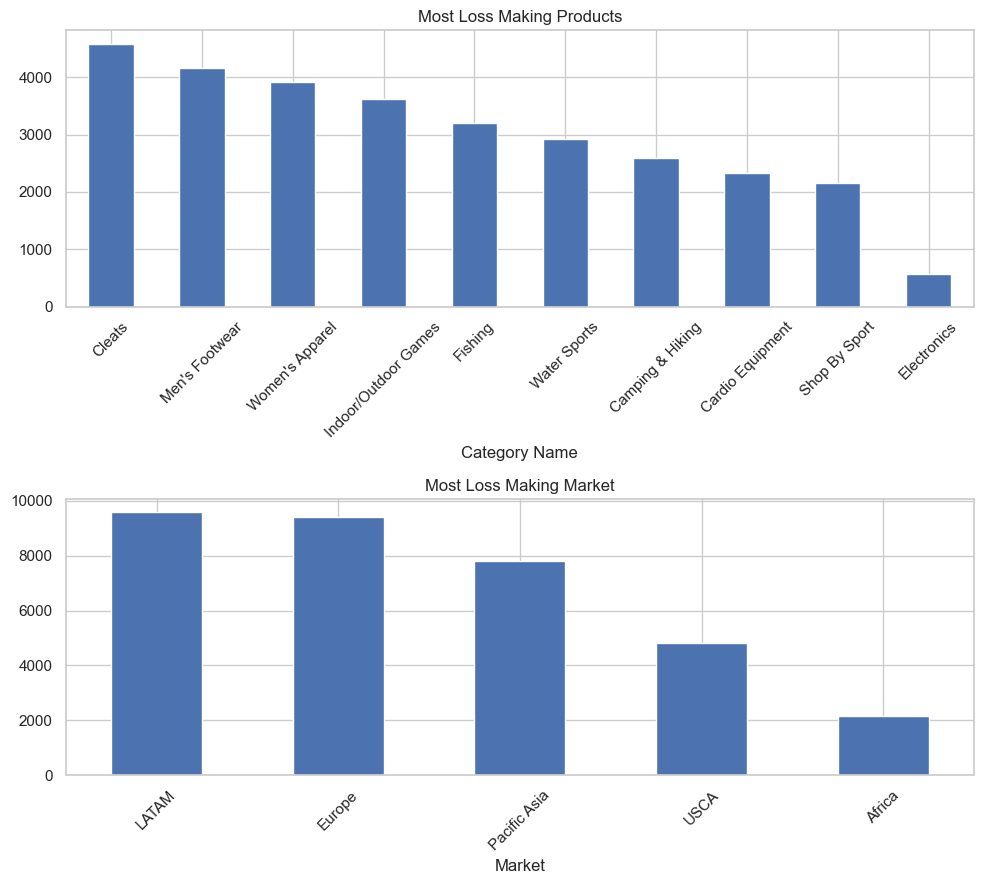

In [23]:
# Setting up the figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 9))  # Adjusting the size for better visibility

# Plotting the Most Loss Making Products
loss['Category Name'].value_counts().nlargest(10).plot.bar(ax=axs[0])
axs[0].set_title("Most Loss Making Products")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)


# Plotting the Most Loss Making Markets
loss['Market'].value_counts().nlargest(10).plot.bar(ax=axs[1])
axs[1].set_title("Most Loss Making Market")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


In [24]:
# Grouping order status by payment type

status = data.groupby('Type')['Order Status'].value_counts()

status_df = pd.DataFrame(status)

status_df

count
Type     Order Status          
CASH     CLOSED           19616
DEBIT    COMPLETE         59491
         ON_HOLD           9804
PAYMENT  PENDING_PAYMENT  39832
         PAYMENT_REVIEW    1893
TRANSFER PROCESSING       21902
         PENDING          20227
         SUSPECTED_FRAUD   4062
         CANCELED          3692

In [25]:
# Now using the suspected fraud to know the products with most fraud cases

fraud_region = data[data['Order Status'] == 'SUSPECTED_FRAUD']

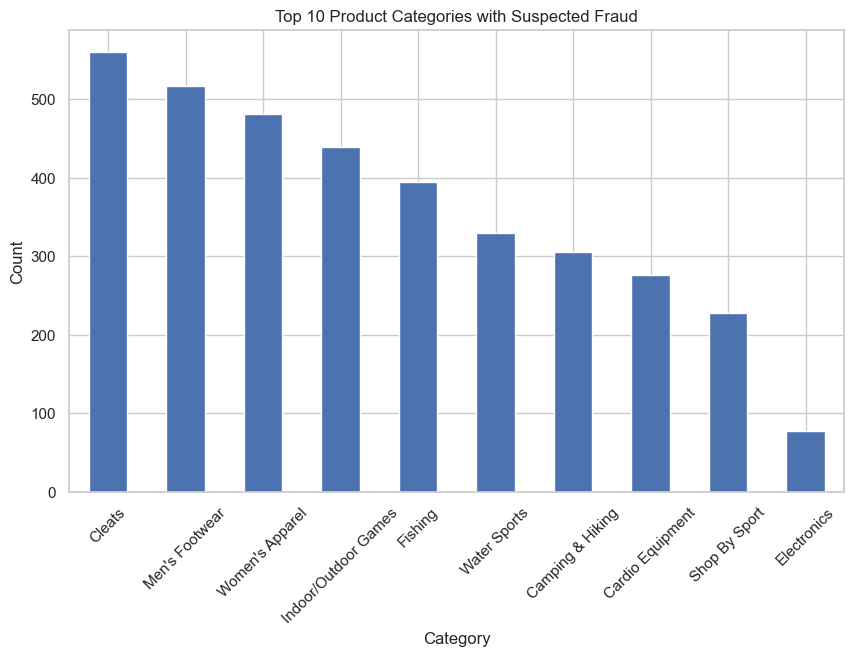

In [26]:
# Getting the counts of the top 10 categories
temp = fraud_region['Category Name'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))  # Setting the figure size

# Creating the bar plot
temp.plot(kind='bar')

# Adding titles and labels
plt.title('Top 10 Product Categories with Suspected Fraud')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating the x-ticks for better readability

# Displaying the plot
plt.show()

# Prepping Data for Modeling

In [81]:
main_df = data.sample(n=2000, random_state=42)

In [82]:
import numpy as np

main_df['flagged'] = np.where(main_df['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)


main_df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Cust_Full_Name,flagged
80120,TRANSFER,5,4,11.090000,175.990005,Late delivery,1,48,Water Sports,Caguas,...,West of USA,California,PROCESSING,1073,48,Pelican Sunstream 100 Kayak,199.990005,Standard Class,ZacharyTate,0
19670,PAYMENT,2,1,9.800000,245.000000,Late delivery,1,24,Women's Apparel,Florissant,...,Central America,Francisco Morazán,PENDING_PAYMENT,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,First Class,GaryOneal,0
114887,TRANSFER,2,4,117.550003,244.899994,Advance shipping,0,46,Indoor/Outdoor Games,Carmichael,...,Central America,Baja California,PROCESSING,1014,46,O'Brien Men's Neoprene Life Vest,49.980000,Standard Class,AndreaAlexander,0
120110,TRANSFER,5,4,118.430000,251.979996,Late delivery,1,43,Camping & Hiking,Troy,...,Southern Africa,Gauteng,PENDING,957,43,Diamondback Women's Serene Classic Comfort Bi,299.980011,Standard Class,JoyceCallahan,0
56658,DEBIT,2,4,-21.590000,107.970001,Advance shipping,0,29,Shop By Sport,Caguas,...,Caribbean,Santiago de Chile,COMPLETE,627,29,Under Armour Girls' Toddler Spine Surge Runni,39.990002,Standard Class,MildredMerritt,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19813,PAYMENT,1,0,16.559999,35.990002,Late delivery,1,29,Shop By Sport,Folsom,...,Western Europe,Auvernia-Ródano-Alpes,PENDING_PAYMENT,627,29,Under Armour Girls' Toddler Spine Surge Runni,39.990002,Same Day,HeatherChang,0
108897,PAYMENT,2,4,-2.810000,215.960007,Advance shipping,0,17,Cleats,Dallas,...,South of USA,Georgia,PENDING_PAYMENT,365,17,Perfect Fitness Perfect Rip Deck,59.990002,Standard Class,MarySmith,0
174183,CASH,3,4,45.330002,120.889999,Advance shipping,0,18,Men's Footwear,Caguas,...,South of USA,Virginia,CLOSED,403,18,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,Standard Class,MarySullivan,0
67793,DEBIT,5,4,8.870000,100.769997,Late delivery,1,44,Hunting & Shooting,Caguas,...,Southern Europe,País Vasco,COMPLETE,977,44,ENO Atlas Hammock Straps,29.990000,Standard Class,AlbertValdez,0


In [83]:
main_df['flagged'].value_counts()

flagged
0    1955
1      45
Name: count, dtype: int64

In [84]:
main_df.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ra

In [85]:
# Drop rows where 'Customer Zipcode' is NaN
main_df = main_df.dropna(subset=['Customer Zipcode'])

In [86]:
main_df['flagged'].value_counts()

flagged
0    1955
1      45
Name: count, dtype: int64

In [87]:
main_df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Name',
       'Product Price', 'Shipping Mode', 'Cust_Full_Name', 'flagged'],
      dtype='object')

In [88]:
# Identify categorical columns
categorical_cols = main_df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Segment', 'Customer State',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Region', 'Order State',
       'Order Status', 'Product Name', 'Shipping Mode', 'Cust_Full_Name'],
      dtype='object')


In [89]:
# instead of One Hot Encoding well proceed with LAbel encoding the variables

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for col in categorical_cols:
  main_df[col] = le.fit_transform(main_df[col])


print(main_df[categorical_cols].head())

        Type  Delivery Status  Category Name  Customer City  Customer Country  \
80120      3                1             44             53                 1   
19670      2                1             45            130                 0   
114887     3                0             29             60                 0   
120110     3                1              8            386                 0   
56658      1                0             37             53                 1   

        Customer Segment  Customer State  Department Name  Market  Order City  \
80120                  0              31                3       4         522   
19670                  0              20                6       2         895   
114887                 1               2                3       2         905   
120110                 0              26                3       0         729   
56658                  0              31                6       2         830   

        Order Country  ord

In [90]:
main_df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Cust_Full_Name,flagged
80120,3,5,4,11.090000,175.990005,1,1,48,44,53,...,21,76,7,1073,48,52,199.990005,3,1244,0
19670,2,2,1,9.800000,245.000000,1,1,24,45,130,...,3,157,6,502,24,44,50.000000,0,279,0
114887,3,2,4,117.550003,244.899994,0,0,46,29,60,...,3,38,7,1014,46,50,49.980000,3,38,0
120110,3,5,4,118.430000,251.979996,1,1,43,8,386,...,16,164,5,957,43,17,299.980011,3,464,0
56658,1,2,4,-21.590000,107.970001,0,0,29,37,53,...,1,412,2,627,29,77,39.990002,3,979,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19813,2,1,0,16.559999,35.990002,1,1,29,37,132,...,22,34,6,627,29,77,39.990002,1,316,0
108897,2,2,4,-2.810000,215.960007,0,0,17,11,94,...,14,166,6,365,17,53,59.990002,3,888,0
174183,0,3,4,45.330002,120.889999,0,0,18,33,53,...,14,465,1,403,18,41,129.990005,3,896,0
67793,1,5,4,8.870000,100.769997,1,1,44,28,53,...,17,357,2,977,44,18,29.990000,3,14,0


In [91]:
# Separate features and target
X = main_df.drop('flagged', axis=1)  # Features
y = main_df['flagged']               # Target

In [92]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split

# we need to adress the fact that our datset is not balanced and there is a huge imbalance of fraud data

# Assuming encoding is done and X, y are defined and we will also stratify the dataset to make sure that
#theres an equal balance of botht the class in test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

adasyn = ADASYN(random_state=42)
X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)


In [93]:
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

# Now apply PCA to the balanced training data
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)

pca = PCA(n_components=0.95)
X_train_res_pca = pca.fit_transform(X_train_res_scaled)


In [94]:
# Check how many components were kept
print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_train_res_pca.shape[1])

Original number of features: 42
Reduced number of features: 23


In [95]:
# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.17321039 0.09862399 0.08565707 0.06826285 0.0646076  0.0527338
 0.05169691 0.04119215 0.03538152 0.03320733 0.03243106 0.02944327
 0.0234417  0.02279151 0.02106969 0.01963605 0.01935995 0.01757887
 0.01609276 0.01512934 0.0144397  0.01213177 0.01103945]


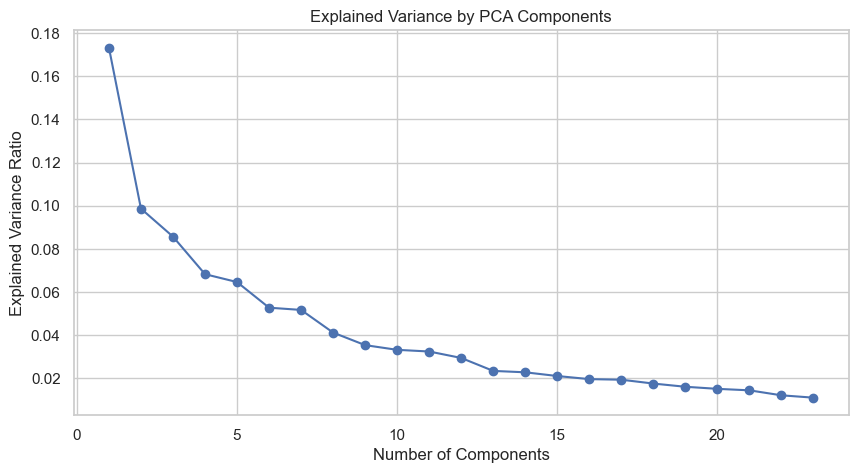

In [96]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


In [97]:
import pandas as pd

# Assuming 'X_train_res_pca' contains your PCA-transformed data from the balanced dataset
# and you've decided to keep the first 5 components
# Create a DataFrame with the selected PCA components
selected_components = X_train_res_pca[:, :5]  # Select the first 5 components
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']  # Naming the components
pca_df = pd.DataFrame(data=selected_components, columns=columns)

# Assuming 'y_train_res' is your target variable from the balanced dataset
pca_df['flagged'] = y_train_res.values  # Add the balanced target variable

# Show the new DataFrame
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5  flagged
0  0.314308 -1.295890 -3.588775  0.972527 -0.668267        0
1  2.327667 -1.107466 -3.176774  0.258459  1.092233        0
2  4.406364  1.336083  2.383452 -2.756477  0.265346        0
3 -4.832777  0.363120 -1.288069 -1.251204  2.858602        0
4  5.879729  0.113587  0.281422 -0.282854 -1.105635        0


In [98]:
pca_df['flagged'].value_counts()

flagged
1    1566
0    1564
Name: count, dtype: int64

In [99]:
# # Splitting the dataset
# X = pca_df.drop('flagged', axis=1)
# y = pca_df['flagged']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# import torch

# # Assuming X_train, X_test, y_train, and y_test are Pandas DataFrames or Series
# dataset = {}

# # Convert DataFrame to NumPy array and then to float tensors
# dataset['train_input'] = torch.from_numpy(X_train.values.astype('float32'))
# dataset['test_input'] = torch.from_numpy(X_test.values.astype('float32'))

# # Convert labels (Series) to NumPy array and then to long tensors
# dataset['train_label'] = torch.from_numpy(y_train.values.astype('int64'))
# dataset['test_label'] = torch.from_numpy(y_test.values.astype('int64'))

In [101]:
# Assume 'pca_df' is your DataFrame from PCA containing inputs and the 'flagged' column as the target
from sklearn.model_selection import train_test_split
import torch

# Splitting data
X = pca_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']].values  # Input features
y = pca_df['flagged'].values                            # Labels

dataset = {}
dataset['train_input'], dataset['test_input'], dataset['train_label'], dataset['test_label'] = train_test_split(
    torch.from_numpy(X.astype('float32')),
    torch.from_numpy(y.astype('int64')),
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [102]:
from kan import KAN

# Assuming a regression-like approach with a single output node
model = KAN(width=[5,3, 1], grid=3, k=3)


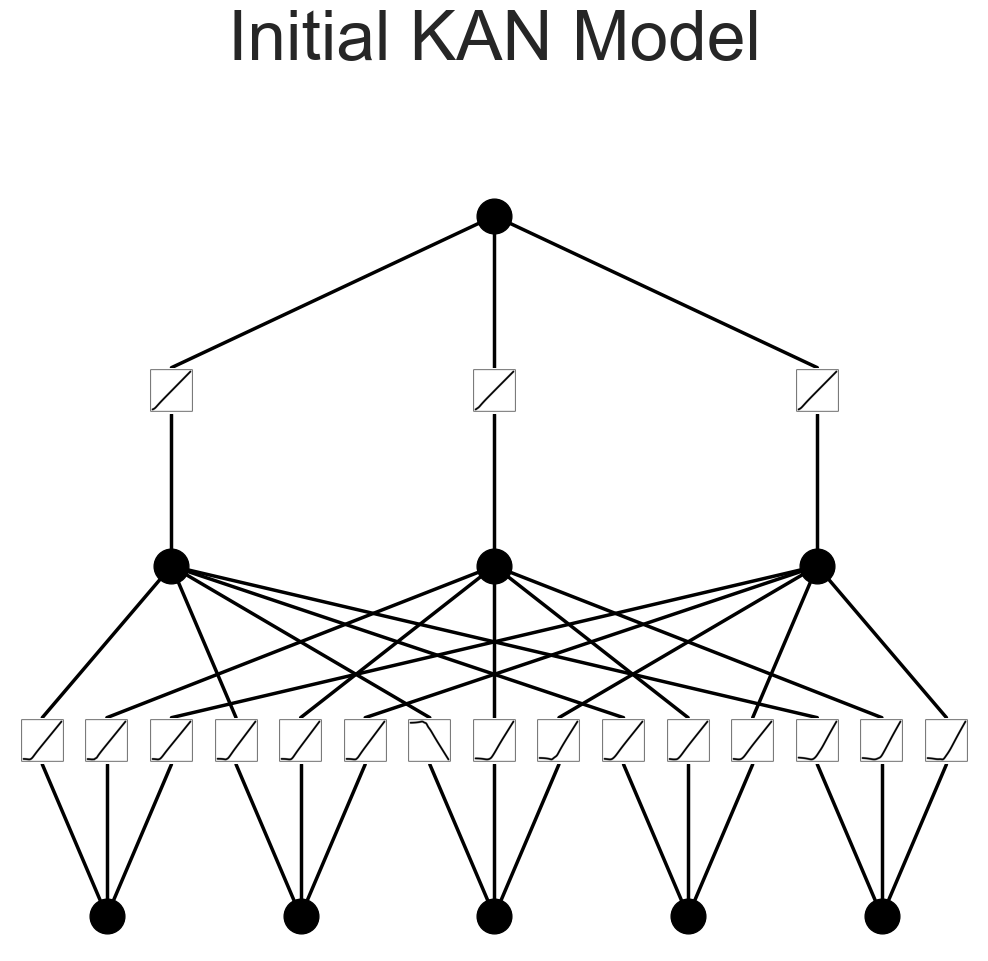

In [103]:
# Initial plot of the model
model(dataset['train_input'])  # Perform a forward pass to initialize
model.plot(beta=100, scale=1.25, title='Initial KAN Model')  # Adjust beta and scale as needed

In [104]:
def train_acc():
    logits = model(dataset['train_input'])[:,0]  # Get raw logits from the model
    pred = torch.sigmoid(logits)  # Apply sigmoid to convert logits to probabilities
    rounded_pred = torch.round(pred)  # Round probabilities to get binary predictions
    acc = (rounded_pred == dataset['train_label']).float().mean()
    print("Train logits sample:", logits[:10])  # Print sample logits to inspect
    print("Train predictions sample:", pred[:10])  # Print probabilities to check
    return acc

def test_acc():
    logits = model(dataset['test_input'])[:,0]
    pred = torch.sigmoid(logits)
    rounded_pred = torch.round(pred)
    acc = (rounded_pred == dataset['test_label']).float().mean()
    print("Test logits sample:", logits[:10])  # Print sample logits to inspect
    print("Test predictions sample:", pred[:10])  # Print probabilities to check
    return acc



In [105]:
image_folder = 'video'

results = model.train(dataset, opt="LBFGS", steps=50, metrics=(train_acc, test_acc),save_fig=True, beta=20, img_folder=image_folder)

results['train_acc'][-1], results['test_acc'][-1]

train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.04e+01 :   0%|           | 0/50 [00:00<?, ?it/s]

Train logits sample: tensor([0.4958, 0.5013, 0.5076, 0.4995, 0.4941, 0.5012, 0.5000, 0.5062, 0.5011,
        0.5031], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6215, 0.6228, 0.6243, 0.6223, 0.6211, 0.6227, 0.6225, 0.6239, 0.6227,
        0.6232], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5073, 0.5051, 0.5005, 0.4988, 0.5056, 0.5063, 0.4991, 0.4996, 0.4991,
        0.5050], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6242, 0.6236, 0.6226, 0.6222, 0.6238, 0.6239, 0.6222, 0.6224, 0.6222,
        0.6236], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.04e+01 :   2%|   | 1/50 [00:04<02:56,  3.61s/it]

Train logits sample: tensor([0.4962, 0.5013, 0.5021, 0.5004, 0.4979, 0.4971, 0.5026, 0.5046, 0.5016,
        0.5029], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6216, 0.6228, 0.6230, 0.6226, 0.6220, 0.6218, 0.6231, 0.6235, 0.6228,
        0.6232], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5084, 0.5027, 0.5014, 0.4992, 0.5039, 0.5027, 0.4988, 0.4950, 0.5002,
        0.5040], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6244, 0.6231, 0.6228, 0.6223, 0.6234, 0.6231, 0.6222, 0.6213, 0.6225,
        0.6234], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.05e+01 :   4%|   | 2/50 [00:08<02:50,  3.56s/it]

Train logits sample: tensor([0.4985, 0.4995, 0.5008, 0.5001, 0.5000, 0.4976, 0.5040, 0.5018, 0.5021,
        0.5016], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6226, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6229,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5053, 0.5016, 0.5019, 0.5005, 0.5022, 0.5015, 0.4984, 0.4962, 0.5000,
        0.5017], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6237, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6229], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.05e+01 :   6%|▏  | 3/50 [00:11<03:00,  3.84s/it]

Train logits sample: tensor([0.4985, 0.4995, 0.5008, 0.5001, 0.5000, 0.4976, 0.5040, 0.5018, 0.5021,
        0.5016], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6226, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6229,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5053, 0.5016, 0.5019, 0.5005, 0.5022, 0.5015, 0.4984, 0.4962, 0.5000,
        0.5017], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6237, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6229], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.05e+01 :   8%|▏  | 4/50 [00:14<02:40,  3.49s/it]

Train logits sample: tensor([0.4987, 0.4994, 0.5008, 0.5002, 0.5000, 0.4976, 0.5041, 0.5017, 0.5022,
        0.5017], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6227, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6230,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5054, 0.5016, 0.5020, 0.5006, 0.5022, 0.5016, 0.4984, 0.4961, 0.5000,
        0.5016], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6237, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6228], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  10%|▎  | 5/50 [00:17<02:31,  3.36s/it]

Train logits sample: tensor([0.4987, 0.4994, 0.5008, 0.5001, 0.5000, 0.4975, 0.5041, 0.5018, 0.5022,
        0.5017], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6227, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6230,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5048, 0.5016, 0.5020, 0.5006, 0.5022, 0.5016, 0.4984, 0.4962, 0.5000,
        0.5017], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6236, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6229], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  12%|▎  | 6/50 [00:21<02:27,  3.35s/it]

Train logits sample: tensor([0.4987, 0.4994, 0.5008, 0.5001, 0.5000, 0.4975, 0.5041, 0.5018, 0.5022,
        0.5017], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6227, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6230,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5048, 0.5016, 0.5020, 0.5006, 0.5022, 0.5016, 0.4984, 0.4962, 0.5000,
        0.5017], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6236, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6229], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  14%|▍  | 7/50 [00:27<03:02,  4.24s/it]

Train logits sample: tensor([0.4987, 0.4994, 0.5008, 0.5001, 0.5000, 0.4975, 0.5041, 0.5018, 0.5022,
        0.5017], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6227, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6230,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5048, 0.5016, 0.5020, 0.5006, 0.5022, 0.5016, 0.4984, 0.4962, 0.5000,
        0.5017], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6236, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6229], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  16%|▍  | 8/50 [00:30<02:44,  3.91s/it]

Train logits sample: tensor([0.4987, 0.4994, 0.5008, 0.5001, 0.5000, 0.4975, 0.5041, 0.5018, 0.5022,
        0.5017], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6227, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6230,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5048, 0.5016, 0.5020, 0.5006, 0.5022, 0.5016, 0.4984, 0.4962, 0.5000,
        0.5017], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6236, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6229], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  18%|▌  | 9/50 [00:33<02:31,  3.69s/it]

Train logits sample: tensor([0.4987, 0.4994, 0.5008, 0.5001, 0.5000, 0.4975, 0.5041, 0.5018, 0.5022,
        0.5017], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6227, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6230,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5048, 0.5016, 0.5020, 0.5006, 0.5022, 0.5016, 0.4984, 0.4962, 0.5000,
        0.5017], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6236, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6229], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  20%|▍ | 10/50 [00:37<02:24,  3.62s/it]

Train logits sample: tensor([0.4987, 0.4994, 0.5008, 0.5001, 0.5000, 0.4975, 0.5041, 0.5018, 0.5022,
        0.5017], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6227, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6230,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5048, 0.5016, 0.5020, 0.5006, 0.5022, 0.5016, 0.4984, 0.4962, 0.5000,
        0.5017], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6236, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6229], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  22%|▍ | 11/50 [00:41<02:31,  3.89s/it]

Train logits sample: tensor([0.4987, 0.4994, 0.5008, 0.5001, 0.5000, 0.4975, 0.5041, 0.5018, 0.5022,
        0.5017], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6227, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6230,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5048, 0.5016, 0.5020, 0.5006, 0.5022, 0.5016, 0.4984, 0.4962, 0.5000,
        0.5017], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6236, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6229], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  24%|▍ | 12/50 [00:44<02:18,  3.66s/it]

Train logits sample: tensor([0.4987, 0.4994, 0.5008, 0.5001, 0.5000, 0.4975, 0.5041, 0.5018, 0.5022,
        0.5017], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6227, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6230,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5048, 0.5016, 0.5020, 0.5006, 0.5022, 0.5016, 0.4984, 0.4962, 0.5000,
        0.5017], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6236, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6229], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  26%|▌ | 13/50 [00:48<02:12,  3.58s/it]

Train logits sample: tensor([0.4987, 0.4994, 0.5008, 0.5001, 0.5000, 0.4975, 0.5041, 0.5018, 0.5022,
        0.5017], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6227, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6230,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5048, 0.5016, 0.5020, 0.5006, 0.5022, 0.5016, 0.4984, 0.4962, 0.5000,
        0.5017], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6236, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6229], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  28%|▌ | 14/50 [00:51<02:04,  3.47s/it]

Train logits sample: tensor([0.4987, 0.4994, 0.5008, 0.5001, 0.5000, 0.4975, 0.5041, 0.5018, 0.5022,
        0.5017], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6227, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6230,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5048, 0.5016, 0.5020, 0.5006, 0.5022, 0.5016, 0.4984, 0.4962, 0.5000,
        0.5017], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6236, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6229], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  30%|▌ | 15/50 [00:54<01:57,  3.37s/it]

Train logits sample: tensor([0.4987, 0.4994, 0.5008, 0.5001, 0.5000, 0.4975, 0.5041, 0.5018, 0.5022,
        0.5017], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6227, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6230,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5048, 0.5016, 0.5020, 0.5006, 0.5022, 0.5016, 0.4984, 0.4962, 0.5000,
        0.5017], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6236, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6229], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  32%|▋ | 16/50 [00:58<01:57,  3.46s/it]

Train logits sample: tensor([0.4987, 0.4994, 0.5008, 0.5001, 0.5000, 0.4975, 0.5041, 0.5018, 0.5022,
        0.5017], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6227, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6230,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5048, 0.5016, 0.5020, 0.5006, 0.5022, 0.5016, 0.4984, 0.4962, 0.5000,
        0.5017], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6236, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6229], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  34%|▋ | 17/50 [01:01<01:51,  3.37s/it]

Train logits sample: tensor([0.4987, 0.4994, 0.5008, 0.5001, 0.5000, 0.4975, 0.5041, 0.5018, 0.5022,
        0.5017], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6227, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6230,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5048, 0.5016, 0.5020, 0.5006, 0.5022, 0.5016, 0.4984, 0.4962, 0.5000,
        0.5017], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6236, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6229], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  36%|▋ | 18/50 [01:04<01:49,  3.43s/it]

Train logits sample: tensor([0.4987, 0.4994, 0.5008, 0.5001, 0.5000, 0.4975, 0.5041, 0.5018, 0.5022,
        0.5017], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6227, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6230,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5048, 0.5016, 0.5020, 0.5006, 0.5022, 0.5016, 0.4984, 0.4962, 0.5000,
        0.5017], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6236, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6229], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  38%|▊ | 19/50 [01:08<01:49,  3.54s/it]

Train logits sample: tensor([0.4987, 0.4994, 0.5008, 0.5001, 0.5000, 0.4975, 0.5041, 0.5018, 0.5022,
        0.5017], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6227, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6230,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5048, 0.5016, 0.5020, 0.5006, 0.5022, 0.5016, 0.4984, 0.4962, 0.5000,
        0.5017], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6236, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6229], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  40%|▊ | 20/50 [01:12<01:48,  3.63s/it]

Train logits sample: tensor([0.4987, 0.4994, 0.5008, 0.5001, 0.5000, 0.4975, 0.5041, 0.5018, 0.5022,
        0.5017], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6227, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6230,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5048, 0.5016, 0.5020, 0.5006, 0.5022, 0.5016, 0.4984, 0.4962, 0.5000,
        0.5017], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6236, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6229], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  42%|▊ | 21/50 [01:15<01:41,  3.50s/it]

Train logits sample: tensor([0.4987, 0.4994, 0.5008, 0.5001, 0.5000, 0.4975, 0.5041, 0.5018, 0.5022,
        0.5017], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6227, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6230,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5048, 0.5016, 0.5020, 0.5006, 0.5022, 0.5016, 0.4984, 0.4962, 0.5000,
        0.5017], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6236, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6229], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  44%|▉ | 22/50 [01:18<01:34,  3.39s/it]

Train logits sample: tensor([0.4987, 0.4994, 0.5008, 0.5001, 0.5000, 0.4975, 0.5041, 0.5018, 0.5022,
        0.5017], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6227, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6230,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5048, 0.5016, 0.5020, 0.5006, 0.5022, 0.5016, 0.4984, 0.4962, 0.5000,
        0.5017], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6236, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6229], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  46%|▉ | 23/50 [01:23<01:43,  3.84s/it]

Train logits sample: tensor([0.4987, 0.4994, 0.5008, 0.5001, 0.5000, 0.4975, 0.5041, 0.5018, 0.5022,
        0.5017], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6227, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6230,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5048, 0.5016, 0.5020, 0.5006, 0.5022, 0.5016, 0.4984, 0.4962, 0.5000,
        0.5017], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6236, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6229], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  48%|▉ | 24/50 [01:26<01:34,  3.62s/it]

Train logits sample: tensor([0.4987, 0.4994, 0.5008, 0.5001, 0.5000, 0.4975, 0.5041, 0.5018, 0.5022,
        0.5017], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6227, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6230,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5048, 0.5016, 0.5020, 0.5006, 0.5022, 0.5016, 0.4984, 0.4962, 0.5000,
        0.5017], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6236, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6229], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  50%|█ | 25/50 [01:30<01:27,  3.48s/it]

Train logits sample: tensor([0.4987, 0.4994, 0.5008, 0.5001, 0.5000, 0.4975, 0.5041, 0.5018, 0.5022,
        0.5017], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6227, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6230,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5048, 0.5016, 0.5020, 0.5006, 0.5022, 0.5016, 0.4984, 0.4962, 0.5000,
        0.5017], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6236, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6229], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  52%|█ | 26/50 [01:33<01:21,  3.40s/it]

Train logits sample: tensor([0.4987, 0.4994, 0.5008, 0.5001, 0.5000, 0.4975, 0.5041, 0.5018, 0.5022,
        0.5017], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6221, 0.6223, 0.6227, 0.6225, 0.6225, 0.6219, 0.6234, 0.6229, 0.6230,
        0.6228], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5048, 0.5016, 0.5020, 0.5006, 0.5022, 0.5016, 0.4984, 0.4962, 0.5000,
        0.5017], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6236, 0.6228, 0.6229, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6229], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  54%|█ | 27/50 [01:36<01:16,  3.34s/it]

Train logits sample: tensor([0.4990, 0.4992, 0.5008, 0.5002, 0.5001, 0.4975, 0.5042, 0.5017, 0.5023,
        0.5017], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6222, 0.6223, 0.6227, 0.6225, 0.6225, 0.6219, 0.6234, 0.6228, 0.6230,
        0.6229], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5048, 0.5017, 0.5021, 0.5007, 0.5022, 0.5016, 0.4984, 0.4962, 0.5001,
        0.5016], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6236, 0.6229, 0.6230, 0.6226, 0.6230, 0.6228, 0.6221, 0.6216, 0.6225,
        0.6228], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.04e+01 :  56%|█ | 28/50 [01:39<01:10,  3.21s/it]

Train logits sample: tensor([0.5001, 0.5005, 0.5001, 0.5003, 0.4996, 0.5000, 0.5009, 0.5010, 0.5013,
        0.5008], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6225, 0.6226, 0.6225, 0.6225, 0.6224, 0.6224, 0.6227, 0.6227, 0.6228,
        0.6226], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5029, 0.5007, 0.5014, 0.5004, 0.5011, 0.5005, 0.4997, 0.5007, 0.5005,
        0.5008], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6231, 0.6226, 0.6228, 0.6225, 0.6227, 0.6226, 0.6224, 0.6226, 0.6226,
        0.6227], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.04e+01 :  58%|█▏| 29/50 [01:43<01:15,  3.60s/it]

Train logits sample: tensor([0.5001, 0.5006, 0.5001, 0.5003, 0.4996, 0.5000, 0.5009, 0.5010, 0.5013,
        0.5008], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6225, 0.6226, 0.6225, 0.6225, 0.6224, 0.6224, 0.6227, 0.6227, 0.6228,
        0.6226], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5029, 0.5007, 0.5014, 0.5003, 0.5011, 0.5005, 0.4997, 0.5006, 0.5005,
        0.5009], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6231, 0.6226, 0.6228, 0.6225, 0.6227, 0.6226, 0.6224, 0.6226, 0.6226,
        0.6227], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.04e+01 :  60%|█▏| 30/50 [01:47<01:11,  3.57s/it]

Train logits sample: tensor([0.4999, 0.5007, 0.5003, 0.5003, 0.4998, 0.5000, 0.5008, 0.5011, 0.5012,
        0.5009], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6224, 0.6226, 0.6225, 0.6225, 0.6224, 0.6225, 0.6226, 0.6227, 0.6227,
        0.6227], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5023, 0.5007, 0.5013, 0.5003, 0.5011, 0.5006, 0.4997, 0.5006, 0.5005,
        0.5010], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6230, 0.6226, 0.6228, 0.6225, 0.6227, 0.6226, 0.6224, 0.6226, 0.6226,
        0.6227], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.04e+01 :  62%|█▏| 31/50 [01:50<01:05,  3.46s/it]

Train logits sample: tensor([0.5000, 0.5006, 0.5000, 0.5003, 0.5001, 0.5004, 0.5007, 0.5008, 0.5006,
        0.5006], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6224, 0.6226, 0.6225, 0.6225, 0.6225, 0.6226, 0.6226, 0.6226, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5003, 0.5003, 0.5007, 0.5000, 0.5007, 0.5002, 0.5002, 0.5009, 0.5004,
        0.5007], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6225, 0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6225, 0.6227, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.04e+01 :  64%|█▎| 32/50 [01:53<01:01,  3.41s/it]

Train logits sample: tensor([0.5000, 0.5006, 0.5000, 0.5003, 0.5001, 0.5004, 0.5007, 0.5008, 0.5006,
        0.5006], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6224, 0.6226, 0.6225, 0.6225, 0.6225, 0.6226, 0.6226, 0.6226, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5003, 0.5003, 0.5007, 0.5000, 0.5007, 0.5002, 0.5002, 0.5009, 0.5004,
        0.5007], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6225, 0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6225, 0.6227, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.04e+01 :  66%|█▎| 33/50 [01:56<00:56,  3.32s/it]

Train logits sample: tensor([0.5003, 0.5005, 0.5000, 0.5004, 0.5002, 0.5006, 0.5008, 0.5006, 0.5007,
        0.5006], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6226, 0.6226, 0.6226, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.4996, 0.5004, 0.5007, 0.5002, 0.5006, 0.5002, 0.5003, 0.5011, 0.5005,
        0.5006], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6224, 0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6225, 0.6227, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.04e+01 :  68%|█▎| 34/50 [01:59<00:52,  3.26s/it]

Train logits sample: tensor([0.5003, 0.5004, 0.5000, 0.5004, 0.5003, 0.5006, 0.5009, 0.5006, 0.5007,
        0.5005], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6226, 0.6227, 0.6226, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.4997, 0.5004, 0.5007, 0.5002, 0.5006, 0.5002, 0.5003, 0.5011, 0.5005,
        0.5006], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6224, 0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6225, 0.6227, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.04e+01 :  70%|█▍| 35/50 [02:03<00:52,  3.50s/it]

Train logits sample: tensor([0.5003, 0.5005, 0.5000, 0.5004, 0.5003, 0.5006, 0.5009, 0.5006, 0.5006,
        0.5005], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6225, 0.6226, 0.6225, 0.6225, 0.6225, 0.6226, 0.6227, 0.6226, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.4997, 0.5003, 0.5007, 0.5002, 0.5006, 0.5002, 0.5003, 0.5011, 0.5005,
        0.5006], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6224, 0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6225, 0.6227, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.04e+01 :  72%|█▍| 36/50 [02:07<00:48,  3.49s/it]

Train logits sample: tensor([0.5003, 0.5005, 0.5000, 0.5004, 0.5003, 0.5006, 0.5009, 0.5006, 0.5006,
        0.5005], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6226, 0.6227, 0.6226, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.4997, 0.5003, 0.5007, 0.5002, 0.5006, 0.5002, 0.5003, 0.5011, 0.5005,
        0.5006], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6224, 0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6225, 0.6227, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.04e+01 :  74%|█▍| 37/50 [02:10<00:43,  3.31s/it]

Train logits sample: tensor([0.5003, 0.5005, 0.5000, 0.5004, 0.5003, 0.5006, 0.5009, 0.5006, 0.5006,
        0.5005], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6226, 0.6227, 0.6226, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.4997, 0.5004, 0.5007, 0.5002, 0.5006, 0.5002, 0.5003, 0.5011, 0.5005,
        0.5006], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6224, 0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6225, 0.6227, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.04e+01 :  76%|█▌| 38/50 [02:13<00:38,  3.18s/it]

Train logits sample: tensor([0.5003, 0.5005, 0.5001, 0.5004, 0.5003, 0.5006, 0.5009, 0.5006, 0.5006,
        0.5005], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6226, 0.6227, 0.6226, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.4996, 0.5004, 0.5007, 0.5002, 0.5006, 0.5002, 0.5003, 0.5011, 0.5005,
        0.5006], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6224, 0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6225, 0.6227, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.04e+01 :  78%|█▌| 39/50 [02:16<00:36,  3.31s/it]

Train logits sample: tensor([0.5003, 0.5005, 0.5001, 0.5004, 0.5003, 0.5006, 0.5009, 0.5006, 0.5006,
        0.5005], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6226, 0.6227, 0.6226, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.4996, 0.5004, 0.5007, 0.5002, 0.5006, 0.5002, 0.5003, 0.5011, 0.5005,
        0.5006], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6224, 0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6225, 0.6227, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.04e+01 :  80%|█▌| 40/50 [02:20<00:34,  3.50s/it]

Train logits sample: tensor([0.5003, 0.5005, 0.5001, 0.5004, 0.5003, 0.5006, 0.5009, 0.5006, 0.5006,
        0.5005], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6226, 0.6227, 0.6226, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.4996, 0.5004, 0.5007, 0.5002, 0.5006, 0.5002, 0.5003, 0.5011, 0.5005,
        0.5006], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6224, 0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6225, 0.6227, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  82%|█▋| 41/50 [02:24<00:31,  3.53s/it]

Train logits sample: tensor([0.5003, 0.5005, 0.5001, 0.5004, 0.5003, 0.5006, 0.5008, 0.5006, 0.5006,
        0.5005], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6226, 0.6227, 0.6226, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.4995, 0.5004, 0.5007, 0.5002, 0.5006, 0.5002, 0.5003, 0.5011, 0.5005,
        0.5006], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6224, 0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6225, 0.6227, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  84%|█▋| 42/50 [02:27<00:27,  3.43s/it]

Train logits sample: tensor([0.5003, 0.5005, 0.5001, 0.5004, 0.5003, 0.5006, 0.5009, 0.5007, 0.5006,
        0.5005], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6226, 0.6227, 0.6226, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.4995, 0.5004, 0.5007, 0.5002, 0.5006, 0.5002, 0.5003, 0.5011, 0.5005,
        0.5006], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6224, 0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6225, 0.6227, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  86%|█▋| 43/50 [02:30<00:23,  3.33s/it]

Train logits sample: tensor([0.5003, 0.5005, 0.5001, 0.5004, 0.5003, 0.5006, 0.5009, 0.5007, 0.5006,
        0.5005], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6226, 0.6227, 0.6226, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.4996, 0.5004, 0.5007, 0.5002, 0.5006, 0.5002, 0.5003, 0.5011, 0.5005,
        0.5006], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6224, 0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6225, 0.6227, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  88%|█▊| 44/50 [02:34<00:21,  3.58s/it]

Train logits sample: tensor([0.5004, 0.5005, 0.5001, 0.5004, 0.5003, 0.5006, 0.5009, 0.5007, 0.5006,
        0.5005], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6225, 0.6226, 0.6225, 0.6225, 0.6225, 0.6226, 0.6227, 0.6226, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.4996, 0.5004, 0.5006, 0.5002, 0.5006, 0.5002, 0.5003, 0.5011, 0.5004,
        0.5006], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6224, 0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6225, 0.6227, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  90%|█▊| 45/50 [02:37<00:17,  3.43s/it]

Train logits sample: tensor([0.5005, 0.5005, 0.5002, 0.5003, 0.5003, 0.5006, 0.5009, 0.5006, 0.5006,
        0.5005], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6226, 0.6226, 0.6225, 0.6225, 0.6225, 0.6226, 0.6227, 0.6226, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5000, 0.5004, 0.5006, 0.5002, 0.5006, 0.5003, 0.5002, 0.5011, 0.5004,
        0.5006], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6224, 0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6225, 0.6227, 0.6225,
        0.6226], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  92%|█▊| 46/50 [02:40<00:13,  3.28s/it]

Train logits sample: tensor([0.5005, 0.5005, 0.5002, 0.5003, 0.5003, 0.5005, 0.5008, 0.5006, 0.5006,
        0.5005], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6226, 0.6226, 0.6225, 0.6225, 0.6225, 0.6226, 0.6226, 0.6226, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5001, 0.5004, 0.5006, 0.5003, 0.5006, 0.5003, 0.5002, 0.5011, 0.5003,
        0.5006], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6225, 0.6226, 0.6226, 0.6225, 0.6226, 0.6225, 0.6225, 0.6227, 0.6225,
        0.6226], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  94%|█▉| 47/50 [02:43<00:09,  3.17s/it]

Train logits sample: tensor([0.5005, 0.5005, 0.5002, 0.5003, 0.5003, 0.5005, 0.5008, 0.5006, 0.5006,
        0.5005], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6226, 0.6226, 0.6225, 0.6225, 0.6225, 0.6226, 0.6226, 0.6226, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5001, 0.5004, 0.5006, 0.5003, 0.5006, 0.5003, 0.5002, 0.5011, 0.5003,
        0.5006], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6225, 0.6226, 0.6226, 0.6225, 0.6226, 0.6225, 0.6225, 0.6227, 0.6225,
        0.6226], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  96%|█▉| 48/50 [02:47<00:06,  3.18s/it]

Train logits sample: tensor([0.5005, 0.5005, 0.5002, 0.5003, 0.5003, 0.5005, 0.5008, 0.5006, 0.5006,
        0.5005], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6226, 0.6226, 0.6225, 0.6225, 0.6225, 0.6226, 0.6226, 0.6226, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5001, 0.5004, 0.5006, 0.5003, 0.5006, 0.5003, 0.5002, 0.5011, 0.5003,
        0.5006], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6225, 0.6226, 0.6226, 0.6225, 0.6226, 0.6225, 0.6225, 0.6227, 0.6225,
        0.6226], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 :  98%|█▉| 49/50 [02:52<00:03,  3.80s/it]

Train logits sample: tensor([0.5004, 0.5005, 0.5001, 0.5001, 0.5001, 0.5003, 0.5006, 0.5006, 0.5005,
        0.5004], grad_fn=<SliceBackward0>)
Train predictions sample: tensor([0.6226, 0.6226, 0.6225, 0.6225, 0.6225, 0.6225, 0.6226, 0.6226, 0.6226,
        0.6226], grad_fn=<SliceBackward0>)
Test logits sample: tensor([0.5008, 0.5003, 0.5005, 0.5001, 0.5006, 0.5003, 0.5000, 0.5008, 0.5002,
        0.5005], grad_fn=<SliceBackward0>)
Test predictions sample: tensor([0.6226, 0.6225, 0.6226, 0.6225, 0.6226, 0.6225, 0.6225, 0.6226, 0.6225,
        0.6226], grad_fn=<SliceBackward0>)


train loss: 5.00e-01 | test loss: 5.00e-01 | reg: 1.03e+01 : 100%|██| 50/50 [02:55<00:00,  3.51s/it]


(0.5003993511199951, 0.5)

In [106]:
import os
import numpy as np
import moviepy.video.io.ImageSequenceClip

image_folder = 'video'  # Ensure this is correctly set
video_name = 'video'
fps = 5

files = os.listdir(image_folder)
train_index = []
for file in files:
    if file[0].isdigit() and file.endswith('.jpg'):
        train_index.append(int(file[:-4]))

train_index = np.sort(train_index)
image_files = [f"{image_folder}/{str(idx)}.jpg" for idx in train_index]

clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile(f"{video_name}.mp4")

Moviepy - Building video video.mp4.
Moviepy - Writing video video.mp4



Moviepy - Done !
Moviepy - video ready video.mp4


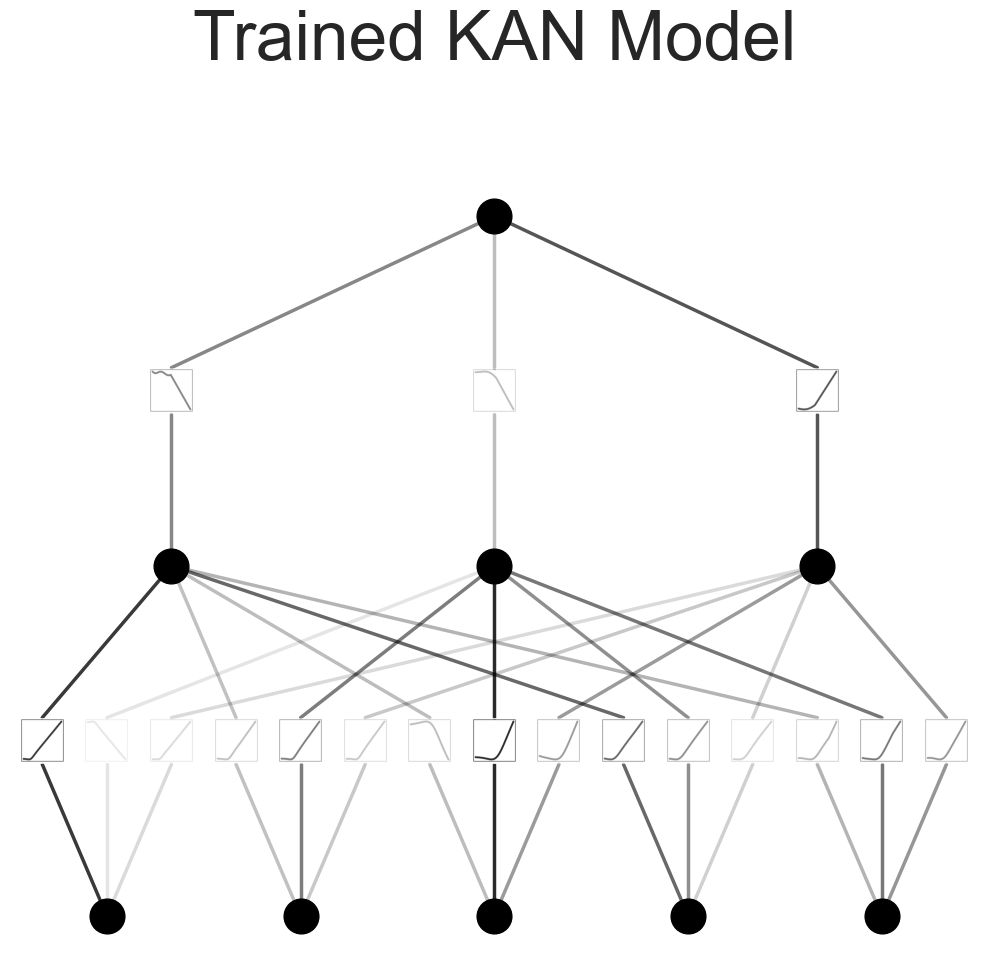

In [107]:
# Plot the model after training
model.plot(beta=50, scale=1.25, title='Trained KAN Model')

In [108]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','tan','abs']
model.auto_symbolic(lib=lib)
formula = model.symbolic_formula()[0][0]
formula

fixing (0,0,0) with sin, r2=0.9939964413642883
fixing (0,0,1) with sin, r2=0.9927775263786316
fixing (0,0,2) with sin, r2=0.9939813613891602
fixing (0,1,0) with sin, r2=0.9870048761367798
fixing (0,1,1) with sin, r2=0.9864187836647034
fixing (0,1,2) with sin, r2=0.9862712025642395
fixing (0,2,0) with tanh, r2=0.9942174553871155
fixing (0,2,1) with tanh, r2=0.9941273331642151
fixing (0,2,2) with tanh, r2=0.9932827949523926
fixing (0,3,0) with sin, r2=0.9965547919273376
fixing (0,3,1) with sin, r2=0.997186005115509
fixing (0,3,2) with sin, r2=0.9970381259918213
fixing (0,4,0) with sin, r2=0.9899638295173645
fixing (0,4,1) with tanh, r2=0.9912147521972656
fixing (0,4,2) with sin, r2=0.9867995381355286
fixing (1,0,0) with x^3, r2=0.8892518281936646
fixing (1,1,0) with x^3, r2=0.9700755476951599
fixing (1,2,0) with x^2, r2=0.9995037317276001


0.01*(-0.26*sin(0.14*x_1 + 5.06) - 0.44*sin(0.19*x_2 - 1.19) + 0.16*sin(0.28*x_4 + 2.01) - 0.27*sin(0.26*x_5 - 1.12) - 0.13*tanh(0.61*x_3 - 1.24) - 1)**2 + 0.5

In [109]:
pruned_model.plot(sample=True, scale=1, title='Model with Samples')

NameError: name 'pruned_model' is not defined

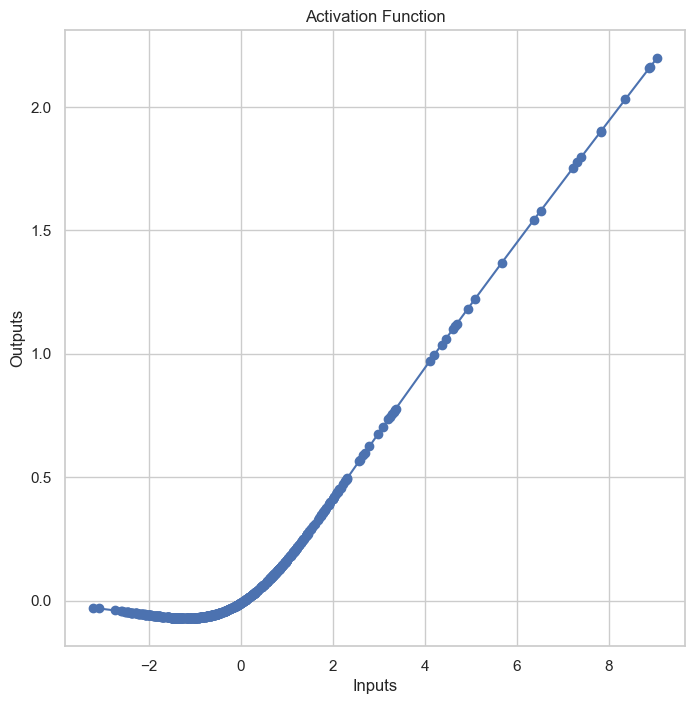

In [110]:
from kan import *
import matplotlib.pyplot as plt

# Assuming l, i, j are layer, input, and output indices respectively for the most significant node
l = 0  # Layer number
i = 3  # Input index
j = 1  # Output index

inputs = model.spline_preacts[l][:,j,i]
outputs = model.spline_postacts[l][:,j,i]
rank = np.argsort(inputs)  # Sort by inputs for a meaningful plot

# Plot activation functions
plt.figure(figsize=(8, 8))
plt.plot(inputs[rank], outputs[rank], marker="o", linestyle='-')
plt.title('Activation Function')
plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.grid(True)
plt.show()

In [111]:
import numpy as np
import sympy as sp

def acc(formula, X, y):
    batch = X.shape[0]
    correct = 0
    # Convert your formula to a function that can accept NumPy arrays
    formula_func = sp.lambdify([sp.symbols(f'x_{i+1}') for i in range(X.shape[1])], formula, "numpy")
    for i in range(batch):
        prediction = formula_func(*X[i])  # Calculate the formula result
        # Assuming y[i] is binary and prediction needs to be rounded for comparison
        correct += (np.round(prediction) == y[i])
    return correct / batch

# Assuming you have converted your dataset's input data to NumPy arrays suitable for the formula function
print('train acc of the formula:', acc(formula, dataset['train_input'], dataset['train_label']))
print('test acc of the formula:', acc(formula, dataset['test_input'], dataset['test_label']))


train acc of the formula: tensor(0.5020)
test acc of the formula: tensor(0.5016)
